### Regresion Lineal Múltiple Regresión con validacion cruzada 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

Métricas: https://scikit-learn.org/stable/api/sklearn.metrics.html

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Automcompletar rápido
%config IPCompleter.greedy=True

#Formato sin notación científica
pd.options.display.float_format = '{:15.2f}'.format 

#Cargamos el dataset sintetico_binaria.csv que está en 00_DATASETS y seleccionamos 5 variables para que el modelo funcione bien
df = pd.read_csv('../Practicas/Madrid_Sale.csv')
df = df[['PRICE', 
    'CONSTRUCTEDAREA', 
    'BATHNUMBER', 
    'ROOMNUMBER', 
    'CADASTRALQUALITYID',
    'HASDOORMAN']]
df.head(300)

,PRICE,CONSTRUCTEDAREA,BATHNUMBER,ROOMNUMBER,CADASTRALQUALITYID,HASDOORMAN
0,126000.00,47,1,1,3.00,1
1,235000.00,54,1,1,3.00,0
2,373000.00,75,1,2,3.00,0
3,284000.00,48,1,1,5.00,0
4,228000.00,50,1,0,7.00,0
...,...,...,...,...,...,...
295,171000.00,49,1,2,6.00,0
296,345000.00,85,2,3,3.00,0
297,90000.00,30,1,1,7.00,0
298,565000.00,142,2,1,4.00,1


In [47]:
print(df.isnull().sum())

PRICE                 0
CONSTRUCTEDAREA       0
BATHNUMBER            0
ROOMNUMBER            0
CADASTRALQUALITYID    1
HASDOORMAN            0
dtype: int64


In [48]:
df = df.dropna()
print(df.isnull().sum())

PRICE                 0
CONSTRUCTEDAREA       0
BATHNUMBER            0
ROOMNUMBER            0
CADASTRALQUALITYID    0
HASDOORMAN            0
dtype: int64


In [50]:
#1. Preparamos los datasets: x e y
x = df.drop(columns='PRICE')
y = df['PRICE']

#2. Dividimos los datasets en 4 objetos y le ponemos Validación al grupo de Test
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.3)

#3. Instanciamos el modelo y el objeto de validación cruzada para comprobar la estabilidad del modelo sobre el grupo de Train
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
rm = LinearRegression()
kf = KFold(n_splits = 5)

#4. Entrenamos los modelos y evaluamos
from sklearn.model_selection import cross_val_score
metricas_cv_rm = cross_val_score(estimator = rm,
                                 X = train_x,
                                 y = train_y,
                                 cv = kf,
                                 scoring = 'neg_mean_absolute_error')
print('Métricas RM Train: ', metricas_cv_rm)             #Comprobamos que los resultados de la validación son estables
print('Media métricas RM Train: ', abs(metricas_cv_rm.mean()))#o iteramos haciendo cambios en las variables

#5. Modelizamos sobre train con el modelo
train_rm_fit = rm.fit(train_x,np.ravel(train_y))#El ravel es para pasarlo en formato plano y que no salga warning

#6. Modelizamos y predecimos sobre validación con el modelo
#val_rm_fit = rm.fit(val_x.values,np.ravel(val_y))#np.ravel es para pasarlo en formato plano y que no salga warning
val_rm_sco = val_rm_fit.predict(val_x.values)

#Extraemos la métrica de medicición del error sobre el grupo de validación
from sklearn.metrics import mean_absolute_error

print('Métricas RM Validación: ', mean_absolute_error(val_y, val_rm_sco))#El grupo de datos de Train predice mejor que el grupo de validación

Métricas RM Train:  [-119268.00375416 -122299.84141012 -122993.60778629 -122496.22486631
 -121858.61085079]
Media métricas RM Train:  121783.25773353214
Métricas RM Validación:  121015.45935120356


In [51]:
pd.DataFrame({'real':val_y,'prediccion':val_rm_sco}).head(20)

,real,prediccion
2263,555000.00,745858.10
41000,1833000.00,1101993.36
18701,165000.00,132202.23
3021,937000.00,1218947.40
53206,755000.00,1170112.80
7874,200000.00,257880.46
17841,172000.00,271738.16
19506,306000.00,570593.12
89268,206000.00,359693.42
15556,89000.00,224539.08


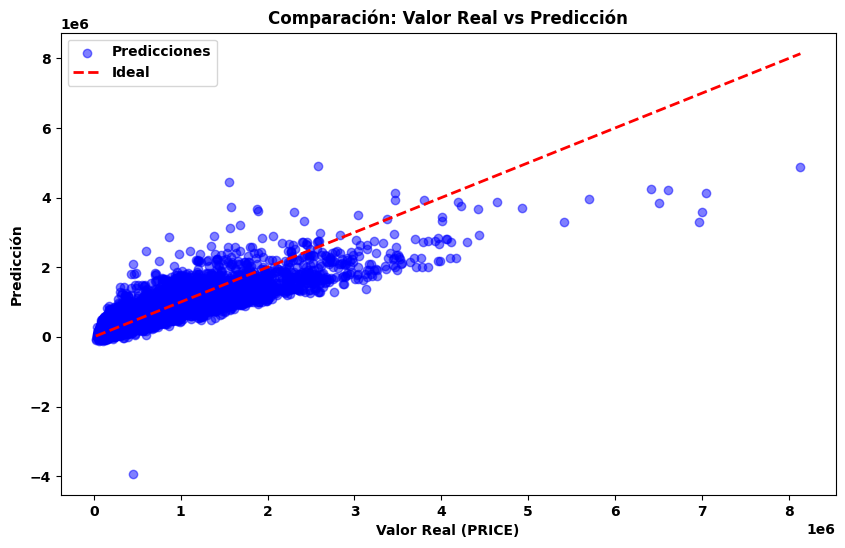

In [34]:
import matplotlib.pyplot as plt

# Configuramos el tamaño
plt.figure(figsize=(10, 6))

# Dibujamos los puntos: Real vs Predicción
plt.scatter(val_y, val_rm_sco, alpha=0.5, color='blue', label='Predicciones')

# Dibujamos la línea de referencia (donde el error sería 0)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], color='red', linestyle='--', lw=2, label='Ideal')

plt.title('Comparación: Valor Real vs Predicción')
plt.xlabel('Valor Real (PRICE)')
plt.ylabel('Predicción')
plt.legend()
plt.show()

- Si los puntos están sobre la línea roja: El modelo es perfecto ($Real = Predicción$).
- Si los puntos están muy dispersos: El error ($MAE$ = $121,388.13$) es alto. En este caso, al ser precios de viviendas, una desviación de $121k$ indica que el modelo aún tiene mucho margen de mejora.